### Logistic Regression

* say we had a dataset where the we have users that range in age, and we know whether or not the users took action after receiving an email (yes/no = 1/0)
* we can plot this on a chart where the x-axis is the user(s) age, and the y-axis ranges from 0 <-> 1
* when we plot our data points (as scatter) we can see a bunch of data points on the x-axis where y = 0, and a bunch along the line y=1
* if we were to try to apply a linear regression, it would tell us nothing (b/c 'y' can only be 1 or 0) **BUT** if we treat the line that fits the data as a **probability** of whether or not someone a certain age says 'yes' we can start slowly making sense of our so called 'model'
* Then, if we go ahead and take our linear model and apply the sigmoid function on it (i.e. substitute y into the sigmoid function), and then you solve for y from the sigmoid function back into the linear function, you'll get the formula for logistic regression!!

$$
\begin{equation}
\mathbf{Linear:} \;\; y = b_0 + b_1 \cdot x \\
\mathbf{Sigmoid\;Function:}\;\; p = \frac{1}{1+e^-y} \\
\mathbf{Logistic\;Regression:} \; ln(\frac{p}{1-p}) = b_0 + b_1 \cdot x \\
\end{equation}
$$

#### Transformation from Linear to Logistic Regression:

<img src="lr_pic.png" alt="Drawing" style="width: 200px; height: 300px;"/>
<div style="text-align: right"> &copy; SuperDataScience </div>

* point of LR is to find that best fitting green line in chart above

<img src="pred_pic.png" alt="Drawing" style="width: 450px; height: 300px;"/>
<div style="text-align: right"> &copy; SuperDataScience </div>

$$
\begin{equation}
important\;to\;notice\;that\;\hat{p}\;\;means\;predicted\;probability
\end{equation}
$$

* even better than having 1/0 because now we know probability of them choosing 1 or 0
* but since we have to give a prediction for y and not p(probability), then we have to decide what threshold (or probability) to chose as ourbaseline (i.e. in this case p=0.5 is our threshold therefore if p<=0.5 y=0 and if p>0.5 then y=1)

#### Implementation

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
#only going to use Age, and Estimated Salary features as our IVs
X = dataset.iloc[:, [2,3]].values
#going to use Purchased as our DV
y = dataset.iloc[:, 4].values
#print(y)

In [12]:
# Splitting the dataset into the Training set and Test set
# want 300 in trainig and 100 in test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#print(y_test)

In [4]:
# Feature Scaling - YES we need to
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#print(X_test)

In [5]:
# Fitting the Logistic Regression Model to the dataset - need linear model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) #only going to use random state parameter
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [7]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

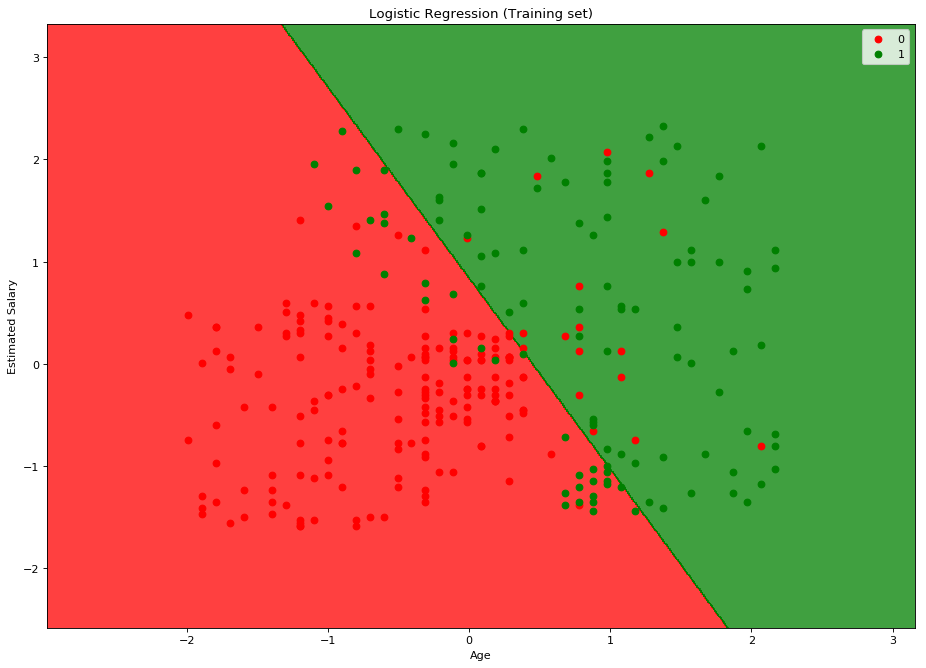

In [8]:
# Visualising the Logistic Regression training results
%matplotlib inline
fig=plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop=X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min()-1, stop=X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

* straight line is the prediction boundary (b/c it's the boundary between the two prediction regions)
* the fact that the line is straight is not by coincidence
    *  That is the essence of a logistic regression
    *  Our logistic regression classifier is a linear classifier!
        *  if we had 3 IVs then our regression would be a flat plane (separating two spaces)
* as you can see though, our linear classifier does not completely accurately catch all of the data into the proper section
* also note that the plot shows just the training set data points

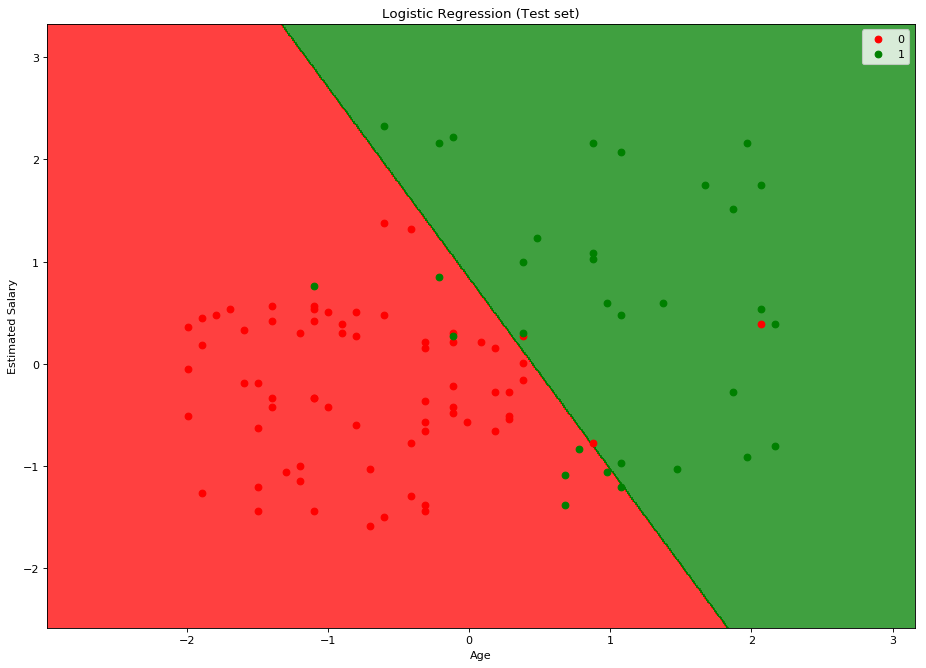

In [9]:
# Visualising the Logistic Regression test set results
%matplotlib inline
fig=plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop=X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min()-1, stop=X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Doesn't look too bad :)